In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv("/content/car_age_price.csv")

In [3]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
data.shape

(112, 2)

In [ ]:
data.isnull().sum()

Year     0
Price    0
dtype: int64

In [ ]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [6]:
data.duplicated().sum()     #counting duplicates if any

54

In [7]:
d = data[data.duplicated()]
d


,Year,Price
3,2018,465000
4,2018,465000
9,2017,575000
15,2017,500000
16,2017,500000
18,2019,500000
19,2017,500000
20,2018,500000
21,2019,500000
23,2017,550000


In [8]:
data.drop_duplicates(inplace=True)    #Droping duplicate values

In [9]:
data.duplicated().sum()      #Checking for duplicates

0

In [10]:
data["Year"].value_counts()

2017    15
2015    12
2019     7
2018     6
2016     6
2014     5
2020     4
2013     3
Name: Year, dtype: int64

In [ ]:
# Outlier Analysis
#fig ,axs= plt.subplots(1, figsize = (5,5))
#plt1 = sns.boxplot(x=data['Year'],color='r')
#plt1.show()

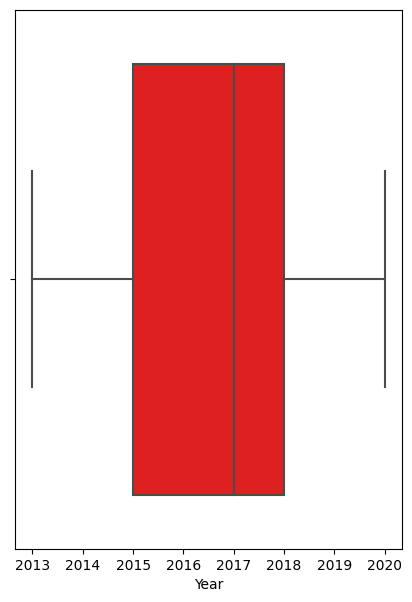

In [11]:
plt.figure(figsize=(5, 7))
sns.boxplot(x=data['Year'],color='r')
plt.show()

In [12]:
#finding the  linear relationship using  perarsons

x_simple = data['Year']
y_simple = data['Price']
my_rho = np.corrcoef(x_simple, y_simple)

print(my_rho)

[[1.         0.80727554]
 [0.80727554 1.        ]]


Positive pearsons corelation.The ones on the diagonals, indicating that the correlation coefficient of a variable with itself is one

 If random variables have high linear associations then their correlation coefficient is close to +1 or -1.

In [13]:
import plotly.express as px
figure = px.scatter(data_frame = data,

                    x="Year",
                    y="Price",

                    trendline="ols",
                    title = "Relationship Between Year and price")
figure.show()

In [14]:
X = data.drop('Price',axis=1)

In [15]:
X

,Year
0,2018
1,2019
2,2019
5,2015
6,2016
7,2017
8,2017
10,2019
11,2018
12,2017


In [16]:
y = data['Price']
y

0      465000
1      755000
2      700000
5      350000
6      425000
7      575000
8      509999
10     500000
11     500000
12     500000
13     600000
14     475000
17     550000
22     434999
30     650000
34     450000
37     486000
38     475000
39     545000
40     525000
42     550000
43     550000
45     450000
48     396000
49     600000
50     325000
52     345000
54     525000
56     341000
58     450000
59     550000
60     490000
61     540000
63     595000
65     495000
67     400000
68     465000
69     300000
70     450000
71     490000
73     320000
77     325000
78     409999
80     390000
81     390000
83     480000
85     320000
86     520000
97     640000
98     700000
99     600000
100    350000
103    375000
104    400000
107    375000
108    300000
109    425000
110    420000
Name: Price, dtype: int64

# **Splitting data into train and test**

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=1)

In [19]:
X_train.head()

,Year
107,2016
59,2016
77,2015
86,2017
54,2017


In [20]:
y_train.head()

107    375000
59     550000
77     325000
86     520000
54     525000
Name: Price, dtype: int64

# **Building a Linear Model**

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection


In [22]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [23]:
print(lm.intercept_,lm.coef_)

-89876937.91108131 [44804.31322609]


**Manualy calculating and predicting on year 2022**

In [24]:
(44804.31322609*2022)+-89876937.91108131


717383.4320726693

In [25]:
x_new=pd.DataFrame({'Year':[2022]})

**Model prediction**

In [26]:
new_preds=lm.predict(x_new)
new_preds

array([717383.43208222])

We get the same prediction equivalent to manual calc.

**Predicting on test data**

In [27]:
preds=lm.predict(X_test)
preds

array([627774.80563003, 582970.49240394, 403753.23949955, 403753.23949955,
       493361.86595175, 493361.86595175, 403753.23949955, 582970.49240394,
       582970.49240394, 448557.55272564, 358948.92627347, 403753.23949955,
       403753.23949955, 314144.61304736, 538166.17917784, 582970.49240394,
       627774.80563003, 314144.61304736])

In [28]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print('mean squared error',(mean_squared_error(y_test,preds)))

print('Root mean Squared Error',sqrt(mean_squared_error(y_test,preds)))

mean squared error 2814665301.245618
Root mean Squared Error 53053.41931719027


# **Lasso Regression model**

In [29]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
preds=lasso.predict(X_test)

In [30]:
from sklearn.metrics import mean_squared_error
from math import sqrt


In [31]:
print('Mean Squared Error',(mean_squared_error(y_test,preds)))
print('Root mean Squared Error',sqrt(mean_squared_error(y_test,preds)))

Mean Squared Error 2814665451.851859
Root mean Squared Error 53053.420736573236


There is minute difference in lasso and linear regression.compared to linear lasso is better.